In [39]:
from datasets import load_dataset
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import einops
import numpy as np

In [45]:
# ds = load_dataset("pittawat/letter_recognition")
ds = load_dataset("AI-Lab-Makerere/beans")

Generating test split: 100%|██████████| 128/128 [00:00<00:00, 5877.72 examples/s]


In [46]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [47]:
def get_dataset(name, batch_size):
    """
    input: str -> name of the dataset
    return: DataLoader, DataLoader -> train, test splits as torch datasets (keys "image" and "label")
    """
    if name == "letter_recognition":
        return _letter_recognition(batch_size)
    
    elif name == "beans":
        return _beans(batch_size)


def _letter_recognition(batch_size, validation_percent=0.20):
    dataset = load_dataset("pittawat/letter_recognition")
    dataset = dataset.with_format("torch")
    train = dataset["train"]
    test = dataset["test"]
    
    # create validation split
    validation_size = int(len(train) * validation_percent)
    train_size = len(train) - validation_size
    train_split, validation_split = random_split(train, [train_size, validation_size])
    
    # Create data loaders
    loader_train = DataLoader(train_split, batch_size=batch_size, shuffle=True)
    loader_validation = DataLoader(validation_split, batch_size=batch_size)
    loader_test = DataLoader(test, batch_size=batch_size)
    
    return loader_train, loader_validation, loader_test
    
    
def _beans(batch_size):
    dataset = load_dataset("AI-Lab-Makerere/beans")
    dataset = dataset.rename_column("labels", "label")
    dataset = dataset.with_format("torch")
    
    train = dataset["train"]
    validation = dataset["validation"]
    test = dataset["test"]
    
    loader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
    loader_validation = DataLoader(validation, batch_size=batch_size)
    loader_test = DataLoader(test, batch_size=batch_size)
    
    return loader_train, loader_validation, loader_test


In [48]:
def plot_image(image, ax=None):
    if ax is None:
        ax = plt.gca()
    image = einops.rearrange(image, "c h w -> h w c")
    ax.imshow(image.cpu().detach().numpy())
    

In [51]:
batch_size = 32
train, validation, test = get_dataset("beans", batch_size=batch_size)

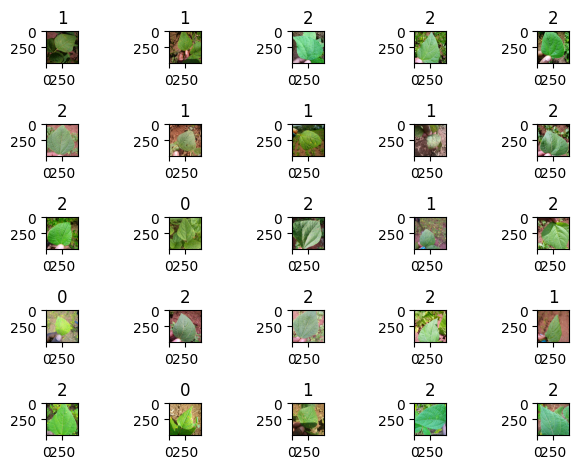

In [52]:
for batch in train:
    x, y = batch["image"], batch["label"]
    N = int(np.sqrt(batch_size))
    fig, axs = plt.subplots(N, N)
    for i in range(N*N):
        ax = axs.flatten()[i]
        plot_image(x[i], ax=ax)
        ax.set_title(f"{y[i].numpy()}")
    fig.tight_layout()
    plt.show()
    break